In [1]:
print ('hello')

hello


In [59]:
python -m pip show plotly

SyntaxError: invalid syntax (2096306482.py, line 1)

In [2]:



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures



from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
df.shape

(400, 26)

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [9]:
df.shape

(158, 26)

In [10]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [11]:
df['pcv_'] = df['pcv'].str.extract(r'(\d+)') # .......... extract all numericals from the column and save it to a new column
df['pcv_'] = df['pcv_'].astype(float) # .................. Turn the new column to a numerical datatype
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,pcv_
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,32.0
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,12100,3.7,yes,yes,no,poor,no,yes,ckd,29.0
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,4500,3.8,yes,yes,no,poor,yes,no,ckd,32.0
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,11000,2.6,yes,yes,yes,poor,yes,no,ckd,16.0
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,9200,3.2,yes,yes,yes,poor,yes,yes,ckd,24.0


In [12]:
df['wc_'] = df['wc'].str.extract(r'(\d+)') 
df['wc_'] = df['wc_'].astype(float)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,rc,htn,dm,cad,appet,pe,ane,classification,pcv_,wc_
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,3.9,yes,no,no,poor,yes,yes,ckd,32.0,6700.0
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,3.7,yes,yes,no,poor,no,yes,ckd,29.0,12100.0
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,3.8,yes,yes,no,poor,yes,no,ckd,32.0,4500.0
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,2.6,yes,yes,yes,poor,yes,no,ckd,16.0,11000.0
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,3.2,yes,yes,yes,poor,yes,yes,ckd,24.0,9200.0


In [13]:
df['rc_'] = df['rc'].str.extract(r'(\d+)') 
df['rc_'] = df['rc_'].astype(float)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,classification,pcv_,wc_,rc_
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,yes,no,no,poor,yes,yes,ckd,32.0,6700.0,3.0
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,yes,yes,no,poor,no,yes,ckd,29.0,12100.0,3.0
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,yes,yes,no,poor,yes,no,ckd,32.0,4500.0,3.0
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,yes,yes,yes,poor,yes,no,ckd,16.0,11000.0,2.0
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,yes,yes,yes,poor,yes,yes,ckd,24.0,9200.0,3.0


In [14]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv_,wc_,rc_
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,274.841772,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342,41.917722,8475.949367,4.417722
std,102.998517,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204,9.105164,3126.880181,1.083843
min,3.000000,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000,9.000000,3800.000000,2.000000
25%,243.000000,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000,37.500000,6525.000000,4.000000
50%,298.500000,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000,44.000000,7800.000000,4.500000
75%,355.750000,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000,48.000000,9775.000000,5.000000
max,399.000000,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [15]:
df.shape

(158, 29)

In [16]:
Categorical = df.select_dtypes(include = 'O')
Categorical

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,abnormal,abnormal,present,notpresent,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,abnormal,abnormal,present,notpresent,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,normal,abnormal,present,present,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,abnormal,abnormal,notpresent,notpresent,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


In [17]:
df.drop('pcv', axis=1, inplace = True)

In [18]:
df.drop('wc', axis=1, inplace= True)

In [19]:
df.drop('rc', axis = 1, inplace = True)

In [20]:
df.drop('id', axis=1, inplace= True)

In [21]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,htn,dm,cad,appet,pe,ane,classification,pcv_,wc_,rc_
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,yes,no,no,poor,yes,yes,ckd,32.0,6700.0,3.0
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,yes,yes,no,poor,no,yes,ckd,29.0,12100.0,3.0
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,yes,yes,no,poor,yes,no,ckd,32.0,4500.0,3.0
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,yes,yes,yes,poor,yes,no,ckd,16.0,11000.0,2.0
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,yes,yes,yes,poor,yes,yes,ckd,24.0,9200.0,3.0


In [22]:
numerical = df.select_dtypes(include = 'number')
numerical

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv_,wc_,rc_
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.0
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.0
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.0
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.0
20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.0


In [23]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,htn,dm,cad,appet,pe,ane,classification,pcv_,wc_,rc_
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,yes,no,no,poor,yes,yes,ckd,32.0,6700.0,3.0
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,yes,yes,no,poor,no,yes,ckd,29.0,12100.0,3.0
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,yes,yes,no,poor,yes,no,ckd,32.0,4500.0,3.0
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,yes,yes,yes,poor,yes,no,ckd,16.0,11000.0,2.0
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,yes,yes,yes,poor,yes,yes,ckd,24.0,9200.0,3.0


In [24]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in Categorical.columns:
    if i in df.columns:
        df[i] = encoder.fit_transform(df[i])

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,htn,dm,cad,appet,pe,ane,classification,pcv_,wc_,rc_
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,1,0,0,1,1,1,0,32.0,6700.0,3.0
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,1,1,0,1,0,1,0,29.0,12100.0,3.0
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,1,1,0,1,1,0,0,32.0,4500.0,3.0
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,1,1,1,1,1,0,0,16.0,11000.0,2.0
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,1,1,1,1,1,1,0,24.0,9200.0,3.0


In [25]:
Categorical

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,abnormal,abnormal,present,notpresent,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,abnormal,abnormal,present,notpresent,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,normal,abnormal,present,present,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,abnormal,abnormal,notpresent,notpresent,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


<Axes: xlabel='classification', ylabel='count'>

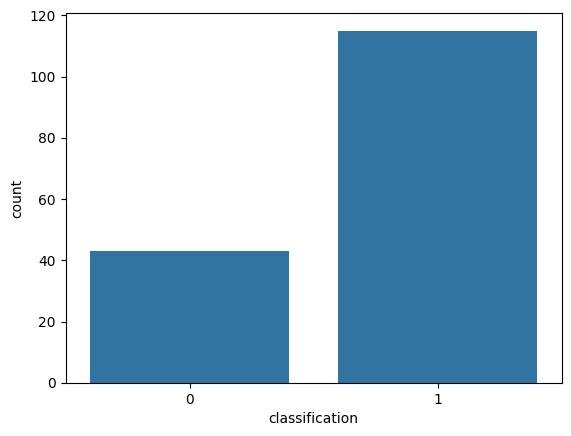

In [26]:
sns.countplot(x = df.classification)

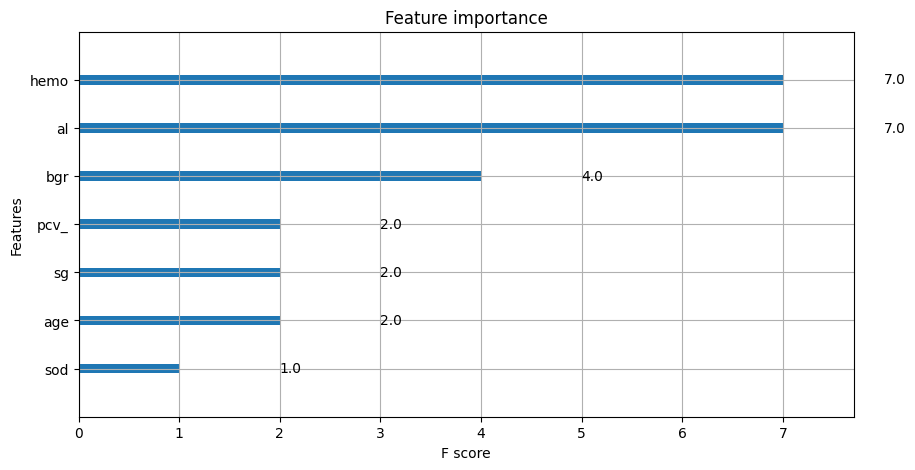

In [27]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = df.drop('classification', axis = 1)
y = df.classification

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [28]:
sel_columns = ['hemo', 'al', 'bgr', 'pcv_', 'sg', 'age', 'sod', 'classification']

sel_data = df[sel_columns]
sel_data

,hemo,al,bgr,pcv_,sg,age,sod,classification
3,11.2,4.0,117.0,32.0,1.005,48.0,111.0,0
9,9.5,2.0,70.0,29.0,1.020,53.0,114.0,0
11,10.8,3.0,380.0,32.0,1.010,63.0,131.0,0
14,5.6,3.0,157.0,16.0,1.010,68.0,130.0,0
20,7.7,2.0,173.0,24.0,1.015,61.0,135.0,0
...,...,...,...,...,...,...,...,...
395,15.7,0.0,140.0,47.0,1.020,55.0,150.0,1
396,16.5,0.0,75.0,54.0,1.025,42.0,141.0,1
397,15.8,0.0,100.0,49.0,1.020,12.0,137.0,1
398,14.2,0.0,114.0,51.0,1.025,17.0,135.0,1


<Axes: xlabel='classification', ylabel='count'>

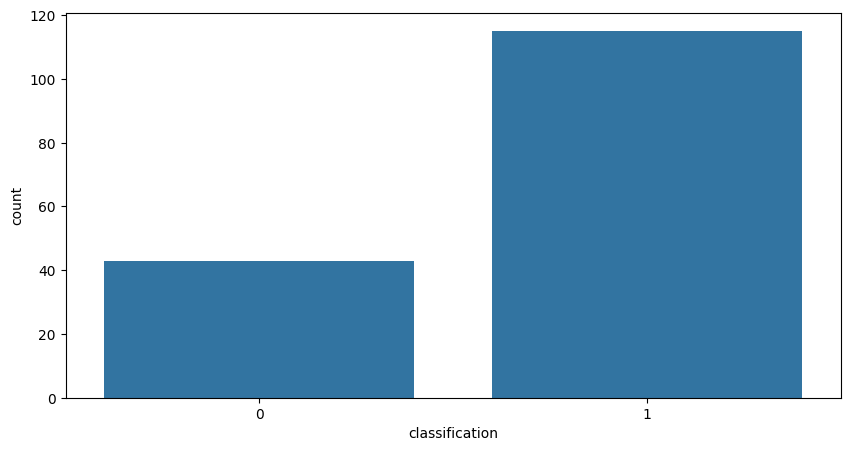

In [29]:
sns.countplot(x = df.classification)

In [30]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
# split into train and test
from sklearn.model_selection import train_test_split


In [33]:
from imblearn.over_sampling import SMOTE


In [34]:
x = sel_data.drop('classification', axis = 1)
y = sel_data.classification

In [35]:
# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 0, stratify = y)

In [36]:
smote = SMOTE(sampling_strategy= 'auto', random_state=0)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

In [37]:
# getting the best random to use for the smote
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

scores = [] # -------------------------------------------------------------- Create a list to store the scores of each loop
for i in range(100):
    smote = SMOTE(sampling_strategy= 'auto', random_state= i)
    X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

    # Creating a model
    model= LogisticRegression()
    model.fit(X_resampled, y_resampled)

    scores.append(accuracy_score(model.predict(X_resampled), y_resampled))

In [38]:
import numpy as np
print(f'Best Random State To Use: {np.array(scores).argmax()}')

Best Random State To Use: 0


In [39]:
smote = SMOTE(sampling_strategy= 'auto', random_state= 0)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

model= LogisticRegression()
model.fit(X_resampled, y_resampled)

LogisticRegression()

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(model.predict(X_resampled), y_resampled))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        92

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



In [41]:
def modeller(x_train, y_train, x_test, y_test, show_train_score = None):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # list of algorithms to be used
    algorithms = [RandomForestClassifier(), XGBClassifier(), DecisionTreeClassifier(), SVC(kernel = 'poly'), LogisticRegression()]

    # keep the training and test scores
    scores = []
    train_validator = []

    for i in algorithms:
        model_name = i
        model_name.fit(x_train, y_train)
        model_validate = model_name.predict(x_train)
        train_validator.append(accuracy_score(model_validate, y_train))

        test_perf = model_name.predict(x_test)
        scores.append(accuracy_score(test_perf, y_test))

    # create a table for each algorithms and scores
    compare_table = pd.DataFrame()
    compare_table['Algorithm'] = pd.Series(algorithms)
    compare_table['Accuracy'] = pd.Series(scores)

    if show_train_score == 'show_train':
        compare_table['Training Accuracy'] = pd.Series(train_validator)
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]
    else:
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]


table, model1, model2 = modeller(X_resampled, y_resampled, xtest, ytest, show_train_score = 'show_train')
table

,Algorithm,Accuracy,Training Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",1.0,1.000000
1,"XGBClassifier(base_score=None, booster=None, c...",1.0,1.000000
2,DecisionTreeClassifier(),1.0,1.000000
3,SVC(kernel='poly'),1.0,0.983696
4,LogisticRegression(),1.0,1.000000


In [42]:
full_data = pd.concat([xtrain, ytrain], axis = 1)

class_0 = full_data.loc[full_data['classification'] == 0]
class_1 = full_data.loc[full_data['classification'] == 1]

print(f'Class of Zero shape: {class_0.shape}\nClass of One shape: {class_1.shape}')

Class of Zero shape: (34, 8)
Class of One shape: (92, 8)


In [43]:
new_class1 = class_1.sample(35)
new_class1.shape

(35, 8)

(69, 8)


<Axes: xlabel='classification', ylabel='count'>

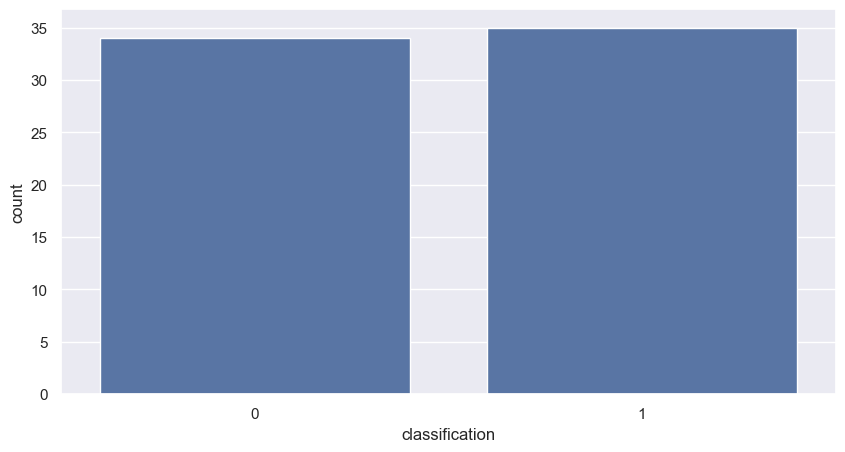

In [44]:
new_balanced_data = pd.concat([class_0, new_class1], axis = 0) # -------- Join the data together
print(new_balanced_data.shape)

sns.set(style = 'darkgrid')
sns.countplot(x = new_balanced_data['classification'])

In [45]:
new_balanced_data

,hemo,al,bgr,pcv_,sg,age,sod,classification
181,10.0,2.0,117.0,30.0,1.025,45.0,136.0,0
128,8.1,4.0,224.0,23.0,1.015,52.0,133.0,0
22,9.8,4.0,95.0,32.0,1.025,48.0,136.0,0
246,8.6,3.0,106.0,26.0,1.015,48.0,120.0,0
171,8.7,3.0,102.0,26.0,1.020,83.0,115.0,0
...,...,...,...,...,...,...,...,...
380,15.3,0.0,113.0,54.0,1.020,59.0,139.0,1
386,16.4,0.0,100.0,43.0,1.025,46.0,142.0,1
373,13.7,0.0,133.0,47.0,1.025,61.0,142.0,1
271,13.8,0.0,96.0,42.0,1.025,30.0,144.0,1


<Axes: xlabel='classification', ylabel='count'>

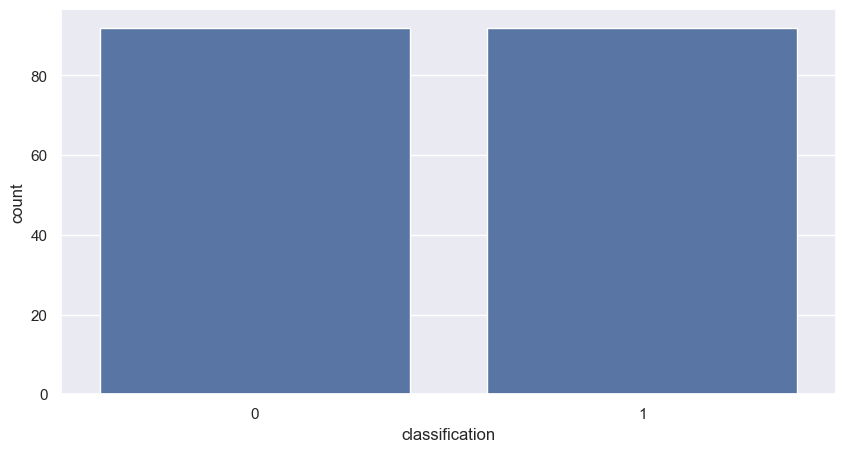

In [46]:
new_balanced_data_smote = pd.concat([X_resampled, y_resampled], axis = 1)

sns.countplot(x = new_balanced_data_smote['classification'])

In [47]:
print(classification_report(model.predict(X_resampled), y_resampled))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        92

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        92

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



<Axes: >

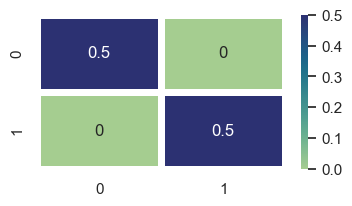

In [48]:

from sklearn.ensemble import RandomForestClassifier
rand_model = RandomForestClassifier()

rand_model.fit(X_resampled, y_resampled)

cross_validation = rand_model.predict(X_resampled)
print(classification_report(cross_validation, y_resampled))

revealer = confusion_matrix(cross_validation, y_resampled)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



<Axes: >

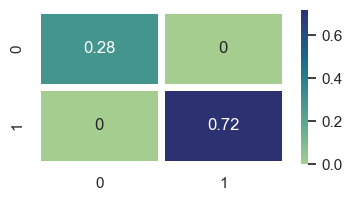

In [49]:
test_prediction = rand_model.predict(xtest)
print(classification_report(test_prediction, ytest))

revealer = confusion_matrix(test_prediction, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [50]:

import pickle

pickle.dump(rand_model, open('kidney_disease_model.pkl', "wb"))

In [51]:
import joblib

In [52]:
imported_model = joblib.load('kidney_disease_model.pkl')

imported_model.predict([[15.8,	0.0,	109.0,	41.0,	1.020,	47.0,	141.0]])

array([1])

In [53]:
imported_model.predict([[8.2,	2.0,	128.0,	22.0,	1.010,	50.0,	134.00]])

array([0])

In [54]:
pd.concat([xtest, ytest], axis = 1)

,hemo,al,bgr,pcv_,sg,age,sod,classification
326,15.8,0.0,109.0,41.0,1.020,47.0,141.0,1
130,8.2,2.0,128.0,22.0,1.010,50.0,134.0,0
71,9.8,1.0,163.0,28.0,1.010,46.0,141.0,0
299,15.1,0.0,127.0,52.0,1.020,73.0,150.0,1
356,17.1,0.0,87.0,47.0,1.025,34.0,144.0,1
329,14.1,0.0,80.0,48.0,1.025,33.0,146.0,1
251,17.0,0.0,70.0,52.0,1.025,23.0,150.0,1
3,11.2,4.0,117.0,32.0,1.005,48.0,111.0,0
153,8.3,2.0,273.0,22.0,1.010,55.0,132.0,0
27,12.5,3.0,264.0,37.0,1.010,69.0,130.0,0
